In [ ]:
# By default, when we visualize an image using imshow(), values are mapped in a range:

# Negative values appear dark (black)
# Zero values appear mid-gray
# Positive values appear bright (white)

# Correlation (correlate2d) - Kernel is NOT flipped
# Convolution (convolve2d) - Kernel is flipped

# Modes - same, full and valid
# If you want output size to match the input (add padding), use same
# If you do not want padding (output will be smaller), use valid
# If you want the entire range of the convolution (output will be bigger), use full

# For 9x9 input ->
# same => output = 9x9
# valid => output = 7x7
# full => output = 11x11

Correlation Result -> 

[[    0.   510.   510.   255.   255.  -255.  -765.  -510.     0.]
 [    0.   255.   255.   765.   765.  -765. -1020.  -255.     0.]
 [    0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.]
 [    0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.]
 [    0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.]
 [    0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.]
 [    0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.]
 [    0.     0.     0.   765.   765.  -765.  -765.     0.     0.]
 [    0.     0.     0.   255.   255.  -255.  -255.     0.     0.]] 



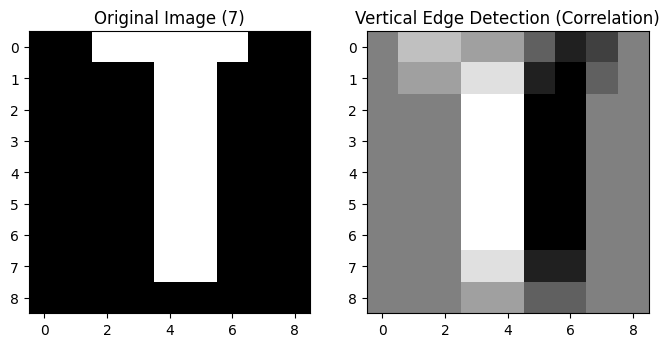

In [5]:
# Correlate - without flipping kernel
# Mode same - Output same size (one pixel padding added)

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.signal import correlate2d


# Step 1: Create a binary image of "7" (black = 0, white = 255)
image = np.array([
       [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.float32)

# Step 2: Define a vertical edge detection kernel (Sobel-like)
vertical_kernel = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
], dtype=np.float32)

corr_result = correlate2d(image, vertical_kernel, mode='same')

print("Correlation Result -> \n")
print(corr_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (7)')

axs[1].imshow(corr_result, cmap='gray')
axs[1].set_title('Vertical Edge Detection (Correlation, same)')

plt.show()

Convolution result -> 

[[    0.  -510.  -510.  -255.  -255.   255.   765.   510.     0.]
 [    0.  -255.  -255.  -765.  -765.   765.  1020.   255.     0.]
 [    0.     0.     0. -1020. -1020.  1020.  1020.     0.     0.]
 [    0.     0.     0. -1020. -1020.  1020.  1020.     0.     0.]
 [    0.     0.     0. -1020. -1020.  1020.  1020.     0.     0.]
 [    0.     0.     0. -1020. -1020.  1020.  1020.     0.     0.]
 [    0.     0.     0. -1020. -1020.  1020.  1020.     0.     0.]
 [    0.     0.     0.  -765.  -765.   765.   765.     0.     0.]
 [    0.     0.     0.  -255.  -255.   255.   255.     0.     0.]] 



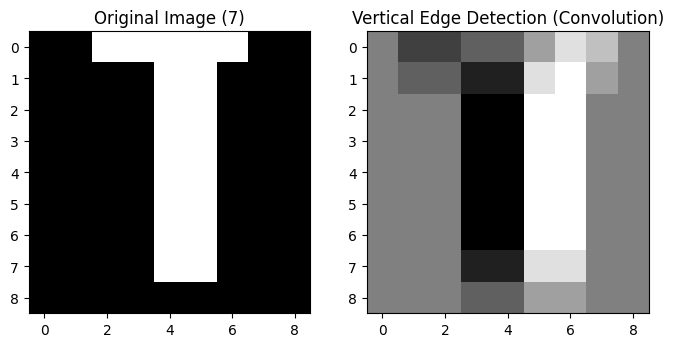

In [9]:
# Convolution - kernel flipped 
# mode same - Output same size (one pixel padding added)

import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import convolve2d


image = np.array([
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype = np.float32)

vertical_kernel = np.array([
    [-1, 0,1],
    [-2, 0, 2],
    [-1, 0 ,1]
], dtype = np.float32)


conv_res = convolve2d(image, vertical_kernel, mode='same')

print('Convolution result -> \n')
print(conv_res, '\n')


flg, axs = plt.subplots(1,2, figsize=(8,4))
axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (7)')

axs[1].imshow(conv_res, cmap='gray')
axs[1].set_title('Vertical Edge Detection (Convolution, same)')

plt.show()

Correlation Result -> 

[[    0.   765.   765.     0.     0.     0.  -765.  -765.     0.]
 [    0.  1020.  1020.     0.     0.     0. -1020. -1020.     0.]
 [    0.  1020.  1020.     0.     0.     0. -1020. -1020.     0.]
 [    0.  1020.  1020.     0.     0.     0. -1020. -1020.     0.]
 [    0.  1020.  1020.     0.     0.     0. -1020. -1020.     0.]
 [    0.  1020.  1020.     0.     0.     0. -1020. -1020.     0.]
 [    0.  1020.  1020.     0.     0.     0. -1020. -1020.     0.]
 [    0.  1020.  1020.     0.     0.     0. -1020. -1020.     0.]
 [    0.   765.   765.     0.     0.     0.  -765.  -765.     0.]] 



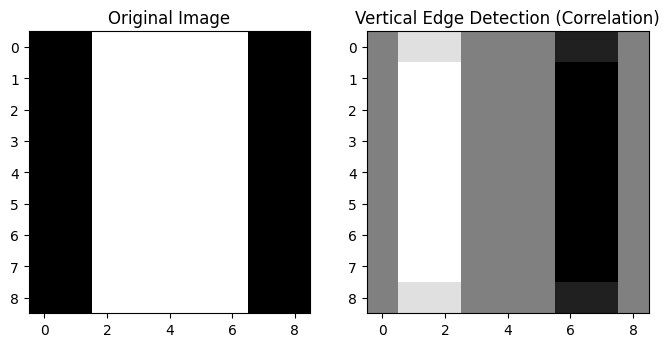

In [10]:
# Correlate - without flipping kernel
# Mode same - Output same size (one pixel padding added)
# original img is a strip

import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

image = np.array([
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0]
    ], dtype = np.float32)

vertical_sobel_kernel = np.array([
    [-1, 0, 1],
    [-2,0,2],
    [-1, 0, 1]
], dtype = np.float32)

corr_res = correlate2d(image, vertical_sobel_kernel, mode='same')

print("Correlation Result -> \n")
print(corr_res, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')

axs[1].imshow(corr_res, cmap='gray')
axs[1].set_title('Vertical Edge Detection (Correlation ,same)')

plt.show()

Correlation Result -> 

[[    0.     0.   255.   255.     0.     0.     0.  -255.  -255.     0.
      0.]
 [    0.     0.   510.   510.   255.   255.  -255.  -765.  -510.     0.
      0.]
 [    0.     0.   255.   255.   765.   765.  -765. -1020.  -255.     0.
      0.]
 [    0.     0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.
      0.]
 [    0.     0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.
      0.]
 [    0.     0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.
      0.]
 [    0.     0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.
      0.]
 [    0.     0.     0.     0.  1020.  1020. -1020. -1020.     0.     0.
      0.]
 [    0.     0.     0.     0.   765.   765.  -765.  -765.     0.     0.
      0.]
 [    0.     0.     0.     0.   255.   255.  -255.  -255.     0.     0.
      0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
      0.]] 



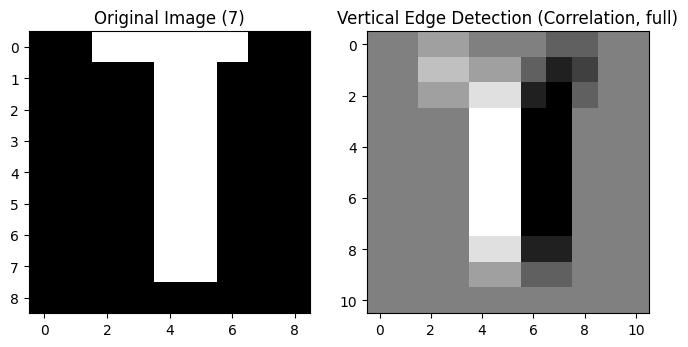

In [13]:
# Correlate - without flipping kernel
# Mode full - Bigger Output

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d


# Step 1: Create a binary image of "7" (black = 0, white = 255)
image = np.array([
       [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.float32)

# Step 2: Define a vertical edge detection kernel (Sobel-like)
vertical_kernel = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
], dtype=np.float32)

corr_result = correlate2d(image, vertical_kernel, mode='full')

print("Correlation Result -> \n")
print(corr_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (7)')

axs[1].imshow(corr_result, cmap='gray')
axs[1].set_title('Vertical Edge Detection (Correlation, full)')

plt.show()

In [ ]:
# Convolve - flipping kernel
# Mode full - Bigger Output

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.signal import convolve2d

# Step 1: Create a binary image of "7" (black = 0, white = 255)
image = np.array([
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.float32)

# Step 2: Define a vertical edge detection kernel (Sobel-like)
vertical_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

conv_result = convolve2d(image, vertical_kernel, mode='full')

print("Convolution Result -> \n")
print(conv_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (7)')

axs[1].imshow(conv_result, cmap='gray')
axs[1].set_title('Vertical Edge Detection (Convolution, full)')

plt.show()

Correlation Result -> 

[[   0.    0.    0.  255.  765.  765.  255.    0.    0.]
 [   0. -255. -765. -765. -255. -255. -510. -255.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0. -255. -765. -765. -255.    0.    0.]
 [   0.    0.    0. -255. -765. -765. -255.    0.    0.]] 



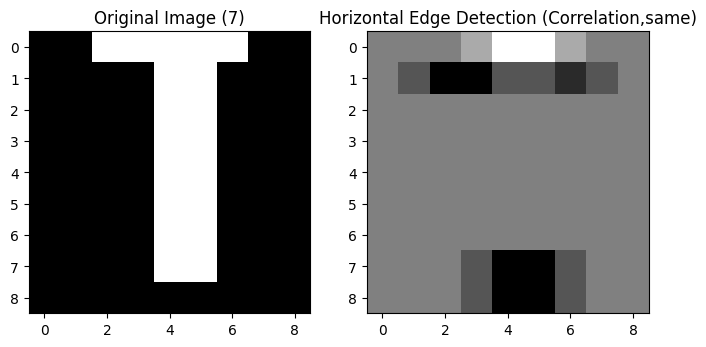

In [15]:
# Correlate with Mode "same" - horizontal edge detection

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.signal import correlate2d

# Step 1: Create a binary image of "7" (black = 0, white = 255)
image = np.array([
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 255, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.float32)

# Step 2: Define a vertical edge detection kernel (Sobel-like)
vertical_kernel = np.array([
    [-1, -2, -1],
    [0 ,  0,  0],
    [1 ,  2,  1]
], dtype=np.float32)

corr_result = correlate2d(image, vertical_kernel, mode='same')

print("Correlation Result -> \n")
print(corr_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (7)')

axs[1].imshow(corr_result, cmap='gray')
axs[1].set_title('Horizontal Edge Detection (Correlation,same)')

plt.show()

Correlation Result -> 

[[ 255.    0.    0.    0.    0.    0. -255. -255.  765.]
 [ 255.    0.    0.    0.    0. -255. -510. 1020. -765.]
 [   0.    0.    0.    0. -255. -510. 1530. -510. -255.]
 [   0.    0.    0. -255. -510. 1530. -510. -255.    0.]
 [   0.    0. -255. -510. 1530. -510. -255.    0.    0.]
 [   0. -255. -510. 1530. -510. -255.    0.    0.    0.]
 [-255. -510. 1530. -510. -255.    0.    0.    0.    0.]
 [-765. 1020. -510. -255.    0.    0.    0.    0.  255.]
 [ 765. -255. -255.    0.    0.    0.    0.    0.  255.]] 



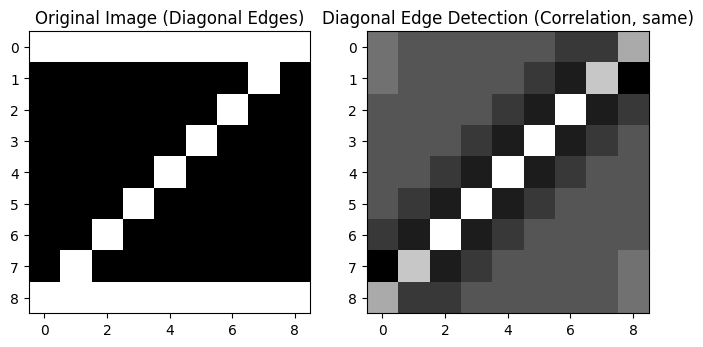

In [19]:
#Correlate with Mode "same" - Diagonal Detection

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

# Step 1: Create a binary image with diagonal edges (Z shape)
image = np.array([
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0, 0, 0, 0, 0, 0, 0, 255, 0],
    [0, 0, 0, 0, 0, 0, 255, 0, 0],
    [0, 0, 0, 0, 0, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 0, 0, 0, 0],
    [0, 0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 0, 0],
    [0, 255, 0, 0, 0, 0, 0, 0, 0],
    [255, 255, 255, 255, 255, 255, 255, 255, 255]
], dtype=np.float32)

# Step 2: Define a diagonal edge detection kernel
# Detects edges along / diagonal direction
diagonal_kernel = np.array([
    [-1, -1, 2],
    [-1,  2, -1],
    [ 2, -1, -1]
], dtype=np.float32)

corr_result = correlate2d(image, diagonal_kernel, mode='same')

print("Correlation Result -> \n")
print(corr_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (Diagonal Edges)')

axs[1].imshow(corr_result, cmap='gray')
axs[1].set_title('Diagonal Edge Detection (Correlation, same)')

plt.show()


Correlation Result 5x5 -> 

[[ 61.2       71.4      101.99999  101.99999  112.19999  132.59999
  132.59999  112.19999  101.99999  101.99999   71.4       61.2     ]
 [ 81.6      101.99999  142.79999  142.79999  163.19998  183.59998
  183.59998  163.19998  142.79999  142.79999  101.99999   81.6     ]
 [101.99999  122.39999  163.19998  152.99998  173.39998  183.59998
  183.59998  173.39998  152.99998  163.19998  122.39999  101.99999 ]
 [ 91.799995 101.99999  142.79999  132.59999  163.19998  173.39998
  173.39998  163.19998  132.59999  142.79999  101.99999   91.799995]
 [ 91.799995 101.99999  142.79999  122.39999  152.99998  152.99998
  152.99998  152.99998  122.39999  142.79999  101.99999   91.799995]
 [101.99999  112.19999  152.99998  132.59999  163.19998  152.99998
  152.99998  163.19998  132.59999  152.99998  112.19999  101.99999 ]
 [101.99999  101.99999  132.59999  101.99999  122.39999  101.99999
  101.99999  122.39999  101.99999  132.59999  101.99999  101.99999 ]
 [101.99999  112.199

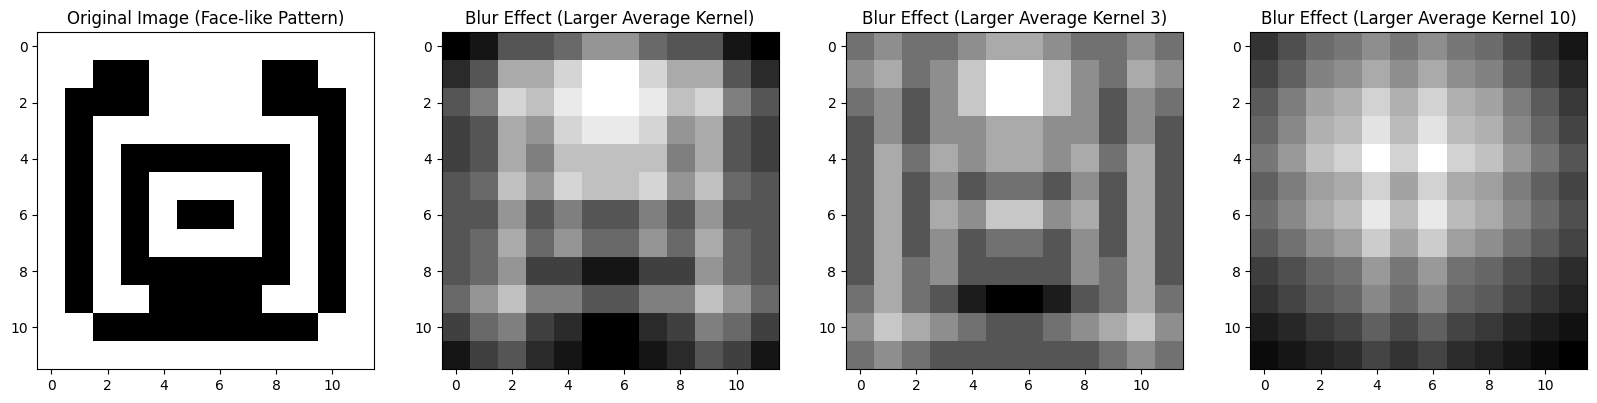

In [24]:
# Blur Effect on Image

# Step 1: Create a larger binary image with a simple face-like pattern
image = np.array([
    [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 0, 0, 255, 255, 255, 255, 0, 0, 255, 255],
    [255, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 255],
    [255, 0, 255, 255, 255, 255, 255, 255, 255, 255, 0, 255],
    [255, 0, 255, 0, 0, 0, 0, 0, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 255, 255, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 0, 0, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 255, 255, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 0, 0, 0, 0, 0, 255, 0, 255],
    [255, 0, 255, 255, 0, 0, 0, 0, 255, 255, 0, 255],
    [255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]
], dtype=np.float32)

# Step 2: Define a larger blur (average) kernel
blur_kernel = np.ones((5, 5), dtype=np.float32) / 25

corr_result = correlate2d(image, blur_kernel, mode='same')

print("Correlation Result 5x5 -> \n")
print(corr_result, "\n")


blur_kernel_3 = np.ones((3, 3), dtype=np.float32) / 9
corr_result_3 = correlate2d(image, blur_kernel_3, mode='same')

blur_kernel_10 = np.ones((10, 10), dtype=np.float32) / 100
corr_result_10= correlate2d(image, blur_kernel_10, mode='same')

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (Face-like Pattern)')

axs[1].imshow(corr_result, cmap='gray')
axs[1].set_title('Blur Effect (Larger Average Kernel)')


axs[2].imshow(corr_result_3, cmap='gray')
axs[2].set_title('Blur Effect (Larger Average Kernel 3)')

axs[3].imshow(corr_result_10, cmap='gray')
axs[3].set_title('Blur Effect (Larger Average Kernel 10)')

plt.show()


Blurred Image -> 

[[ 52.04082   72.85715   93.67346  114.48978  114.48978  124.897934
  135.3061   145.71428  145.71428  145.71428  145.71428  145.71428
  145.71428  145.71428  145.71428  130.10202  114.48978  104.08162
  104.08162   83.265305  62.448986  41.632656]
 [ 62.448986  83.265305 104.08162  124.897934 119.693855 130.10202
  140.5102   156.12245  161.32654  166.53062  171.73471  176.9388
  182.14288  176.9388   171.73471  150.91837  135.3061   119.693855
  119.693855  93.67346   72.85715   52.04082 ]
 [ 72.85715   98.87754  124.897934 150.91837  145.71428  156.12245
  166.53062  187.34697  192.55106  197.75514  202.95923  208.16331
  218.57149  208.16331  202.95923  176.9388   161.32654  140.5102
  140.5102   109.2857    88.46938   62.448986]
 [ 83.265305 114.48978  140.5102   166.53062  161.32654  171.73471
  182.14288  202.95923  202.95923  208.16331  213.3674   213.3674
  228.97966  213.3674   213.3674   187.34697  176.9388   156.12245
  161.32654  124.897934 104.08162   7

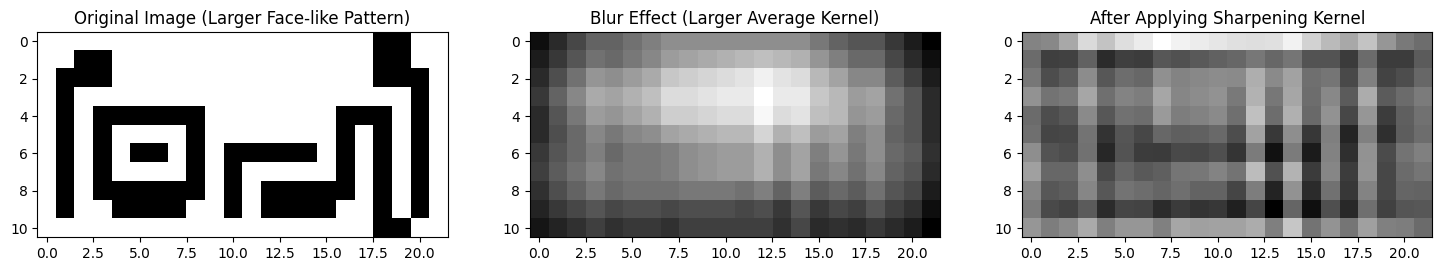

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

# Step 1: Create a larger binary image with a detailed face-like pattern
image = np.array([
    [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 255, 255],
    [255, 255, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 255, 255],
    [255, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 255],
    [255, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 255],
    [255, 0, 255, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 255, 255, 255, 0, 255, 255, 255, 255, 255, 255, 255, 0, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 0, 0, 255, 0, 255, 0, 0, 0, 0, 0, 255, 0, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 255, 255, 255, 255, 0, 255, 0, 255, 255, 255, 255, 255, 0, 255, 0, 255, 0, 255],
    [255, 0, 255, 0, 0, 0, 0, 0, 0, 255, 0, 255, 0, 0, 0, 0, 0, 255, 0, 255, 0, 255],
    [255, 0, 255, 255, 0, 0, 0, 0, 255, 255, 0, 255, 0, 0, 0, 0, 255, 255, 0, 255, 0, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 255, 255]
], dtype=np.float32)

# Step 2: Define a larger blur (average) kernel
blur_kernel = np.ones((7, 7), dtype=np.float32) / 49

# Apply blur
blurred_image = correlate2d(image, blur_kernel, mode='same')

# Step 3: Define a sharpening kernel
sharpen_kernel = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
], dtype=np.float32)

# Apply sharpening
sharpened_image = correlate2d(blurred_image, sharpen_kernel, mode='same')

print("Blurred Image -> \n")
print(blurred_image, "\n")

print("Sharpened Image -> \n")
print(sharpened_image, "\n")

# Step 4: Visualize Results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (Larger Face-like Pattern)')

axs[1].imshow(blurred_image, cmap='gray')
axs[1].set_title('Blur Effect (Larger Average Kernel)')

axs[2].imshow(sharpened_image, cmap='gray')
axs[2].set_title('After Applying Sharpening Kernel')

plt.show()